# Предобработка данных.

In [1]:
import numpy as np
import pandas as pd

In [2]:
DATASET_TEST_PATH = 'test.csv'
DATASET_TRAIN_PATH = 'train.csv'
PREPARED_DATASET_TEST_PATH = 'test_prepared.csv'
PREPARED_DATASET_TRAIN_PATH = 'train_prepared.csv'

### Загрузка данных

In [3]:
df_test = pd.read_csv(DATASET_TEST_PATH, delimiter=',')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


Используем метод shape для того, чтобы узнать размер полученных данных.

In [4]:
df_test.shape

(5000, 19)

In [5]:
df_train = pd.read_csv(DATASET_TRAIN_PATH, delimiter=',')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
df_train.shape

(10000, 20)

Необходимо определить количество нулевых объектов для каждого из полей для дальнейшей замены.

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Изучение описания каждого из DataFrame поможет определить очевидные выбросы.

In [9]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [10]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [11]:
df_test_obj = df_test.select_dtypes(include='object')
df_test_obj.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,A


In [12]:
df_train_obj = df_train.select_dtypes(include='object')
df_train_obj.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [13]:
df_test['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [14]:
df_test['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [15]:
df_test['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [16]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [17]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [18]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### Обработка пропусков

In [19]:
len(df_test) - df_test.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [20]:
len(df_train) - df_train.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

##### LifeSquare

In [21]:
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = df_test['LifeSquare'].median()
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['LifeSquare'].median()

##### Healthcare_1

In [22]:
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = df_test['Healthcare_1'].median()
df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

### Обработка выбросов

In [23]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [24]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


##### Rooms

In [25]:
df_test[df_test['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [26]:
df_train[df_train['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,900.0,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,900.0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [27]:
df_test.loc[df_test['Rooms'] > 6, 'Rooms'] = df_test['Rooms'].median()
df_train.loc[df_train['Rooms'] > 6, 'Rooms'] = df_train['Rooms'].median()

##### Square

In [28]:
df_test[df_test['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,900.0,1,4,B
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,B,B,7,1660,39,1786.0,1,5,B


In [29]:
df_train[df_train['Square'] > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,32.781260,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


In [30]:
df_test.loc[df_test['Square'] > 200, 'Square'] = df_test['Square'].median()
df_train.loc[df_train['Square'] > 300, 'Square'] = df_train['Square'].median()

##### LifeSquare

In [31]:
df_test[df_test['LifeSquare'] > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,900.0,0,0,B


In [32]:
df_train[df_train['LifeSquare'] > 400]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B,217357.492366
4690,2307,102,1.0,52.513310,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,52.513310,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [33]:
df_test.loc[df_test['LifeSquare'] > 300, 'LifeSquare'] = df_test['LifeSquare'].median()
df_train.loc[df_train['LifeSquare'] > 400, 'LifeSquare'] = df_train['LifeSquare'].median()

##### KitchenSquare

In [34]:
df_test[df_test['KitchenSquare'] > 70]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1777,3341,62,3.0,112.114019,112.247841,112.0,3,3.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [35]:
df_train[df_train['KitchenSquare'] > 120]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,900.0,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,900.0,0,0,B,234194.837047


In [36]:
df_test.loc[df_test['KitchenSquare'] > 70, 'KitchenSquare'] = df_test['KitchenSquare'].median()
df_train.loc[df_train['KitchenSquare'] > 120, 'KitchenSquare'] = df_train['KitchenSquare'].median()

##### Floor

In [37]:
df_test[df_test['Floor'] > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3711,414,76,2.0,67.609808,41.175948,5.0,46,48.0,2002,0.0,B,B,7,1660,39,1786.0,1,5,B
4698,15759,17,2.0,57.601870,37.744743,10.0,78,22.0,1989,0.0,B,B,25,5027,4,46.0,1,1,B


In [38]:
df_train[df_train['Floor'] > 40]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2781,1674,76,2.0,74.344672,41.044132,5.0,42,48.0,2016,0.0,B,B,7,1660,39,1786.0,1,5,B,411691.504766


In [39]:
df_test.loc[df_test['Floor'] > 40, 'Floor'] = df_test['Floor'].median()
df_train.loc[df_train['Floor'] > 40, 'Floor'] = df_train['Floor'].median()

##### HouseFloor

In [40]:
df_test[df_test['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,47.098813,9.0,18.0,99.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A


In [41]:
df_train[df_train['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6.0,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,74.579809,9.0,5.0,99.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,243329.912579
8854,78,30,2.0,65.773749,66.811789,1.0,8.0,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


In [42]:
df_test.loc[df_test['HouseFloor'] > 50, 'HouseFloor'] = df_test['HouseFloor'].median()
df_train.loc[df_train['HouseFloor'] > 50, 'Floor'] = df_train['HouseFloor'].median()

In [43]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.907000,56.381750,35.431520,5.814600,8.610000,12.583600,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,4832.674037,44.179466,0.810976,18.802396,15.458762,4.432895,5.368842,6.678318,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.919578,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.269760,41.760597,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,189.679576,169.901701,65.000000,38.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


### Отбор и построение новых признаков

##### Исключаем "Id", так как данный признак ни на что не влияет

In [44]:
df_test = df_test.drop(['Id'], axis=1)
df_train = df_train.drop(['Id'], axis=1)

##### Преобразовываем категориальные признаки Ecology_2, Ecology_3, Shops_2 в бинарные

In [45]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Ecology_2'], prefix='eco_2')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Ecology_3'], prefix='eco_3')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Shops_2'], prefix='sh_2')], axis=1)

In [46]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Ecology_2'], prefix='eco_2')], axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Ecology_3'], prefix='eco_3')], axis=1)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Shops_2'], prefix='sh_2')], axis=1)

In [47]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,eco_2_A,eco_2_B,eco_3_A,eco_3_B,sh_2_A,sh_2_B
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,B,...,900.0,0,0,B,0,1,0,1,0,1
1,74,2.0,69.263183,32.925087,1.0,6.0,1.0,1977,0.075779,B,...,900.0,0,2,B,0,1,0,1,0,1
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,B,...,4702.0,5,5,B,0,1,0,1,0,1
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,B,...,900.0,3,3,B,0,1,0,1,0,1
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,B,...,900.0,0,0,A,0,1,0,1,1,0


In [48]:
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,eco_2_A,eco_2_B,eco_3_A,eco_3_B,sh_2_A,sh_2_B
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,B,...,0,11,B,184966.930730,0,1,0,1,0,1
1,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,B,...,1,16,B,300009.450063,0,1,0,1,0,1
2,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,B,...,1,3,B,220925.908524,0,1,0,1,0,1
3,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,B,...,0,5,B,175616.227217,0,1,0,1,0,1
4,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,B,...,2,4,B,150226.531644,0,1,0,1,0,1


##### Исключаем колонки Ecology_2, Ecology_3, Shops_2 за ненадобностью. 
##### Кроме того, можно удалить колонки для значений A, так как ответ всего доступно два признака.
##### Если в колонке B, будет стоять ноль, то это автоматически будет означать, что значение равно A.

In [49]:
df_test = df_test.drop(['Ecology_2'], axis=1)
df_test = df_test.drop(['Ecology_3'], axis=1)
df_test = df_test.drop(['Shops_2'], axis=1)
df_train = df_train.drop(['Ecology_2'], axis=1)
df_train = df_train.drop(['Ecology_3'], axis=1)
df_train = df_train.drop(['Shops_2'], axis=1)
df_test = df_test.drop(['eco_2_A'], axis=1)
df_test = df_test.drop(['eco_3_A'], axis=1)
df_test = df_test.drop(['sh_2_A'], axis=1)
df_train = df_train.drop(['eco_2_A'], axis=1)
df_train = df_train.drop(['eco_3_A'], axis=1)
df_train = df_train.drop(['sh_2_A'], axis=1)

In [50]:
df_test['eco_2_B'] = df_test['eco_2_B'].astype('bool')
df_test['eco_3_B'] = df_test['eco_3_B'].astype('bool')
df_test['sh_2_B'] = df_test['sh_2_B'].astype('bool')
df_train['eco_2_B'] = df_train['eco_2_B'].astype('bool')
df_train['eco_3_B'] = df_train['eco_3_B'].astype('bool')
df_train['sh_2_B'] = df_train['sh_2_B'].astype('bool')

In [51]:
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,eco_2_B,eco_3_B,sh_2_B
0,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,33,7976,5,900.0,0,11,184966.930730,True,True,True
1,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,True,True,True
2,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,True,True,True
3,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,True,True,True
4,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,True,True,True


### Анализ целевой переменной с использованием MatplotLib

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
matplotlib.rcParams.update({'font.size' : 14})

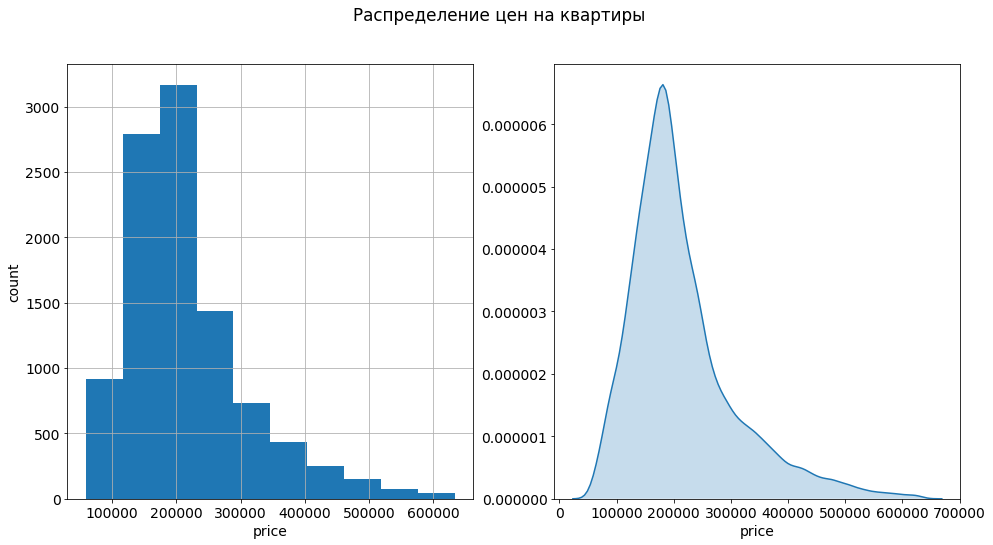

In [54]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['Price'].hist()
plt.ylabel('count')
plt.xlabel('price')

plt.subplot(122)
sns.kdeplot(df_train['Price'], shade=True, legend=False)
plt.xlabel('price')
plt.suptitle('Распределение цен на квартиры')
plt.show()

##### Распредедение близко к нормальному. 
##### Посмотрим с помощью матрицы корреляций зависимости между величинами. 
##### На основе данной матрицы исключим наиболее влиятельные признаки.

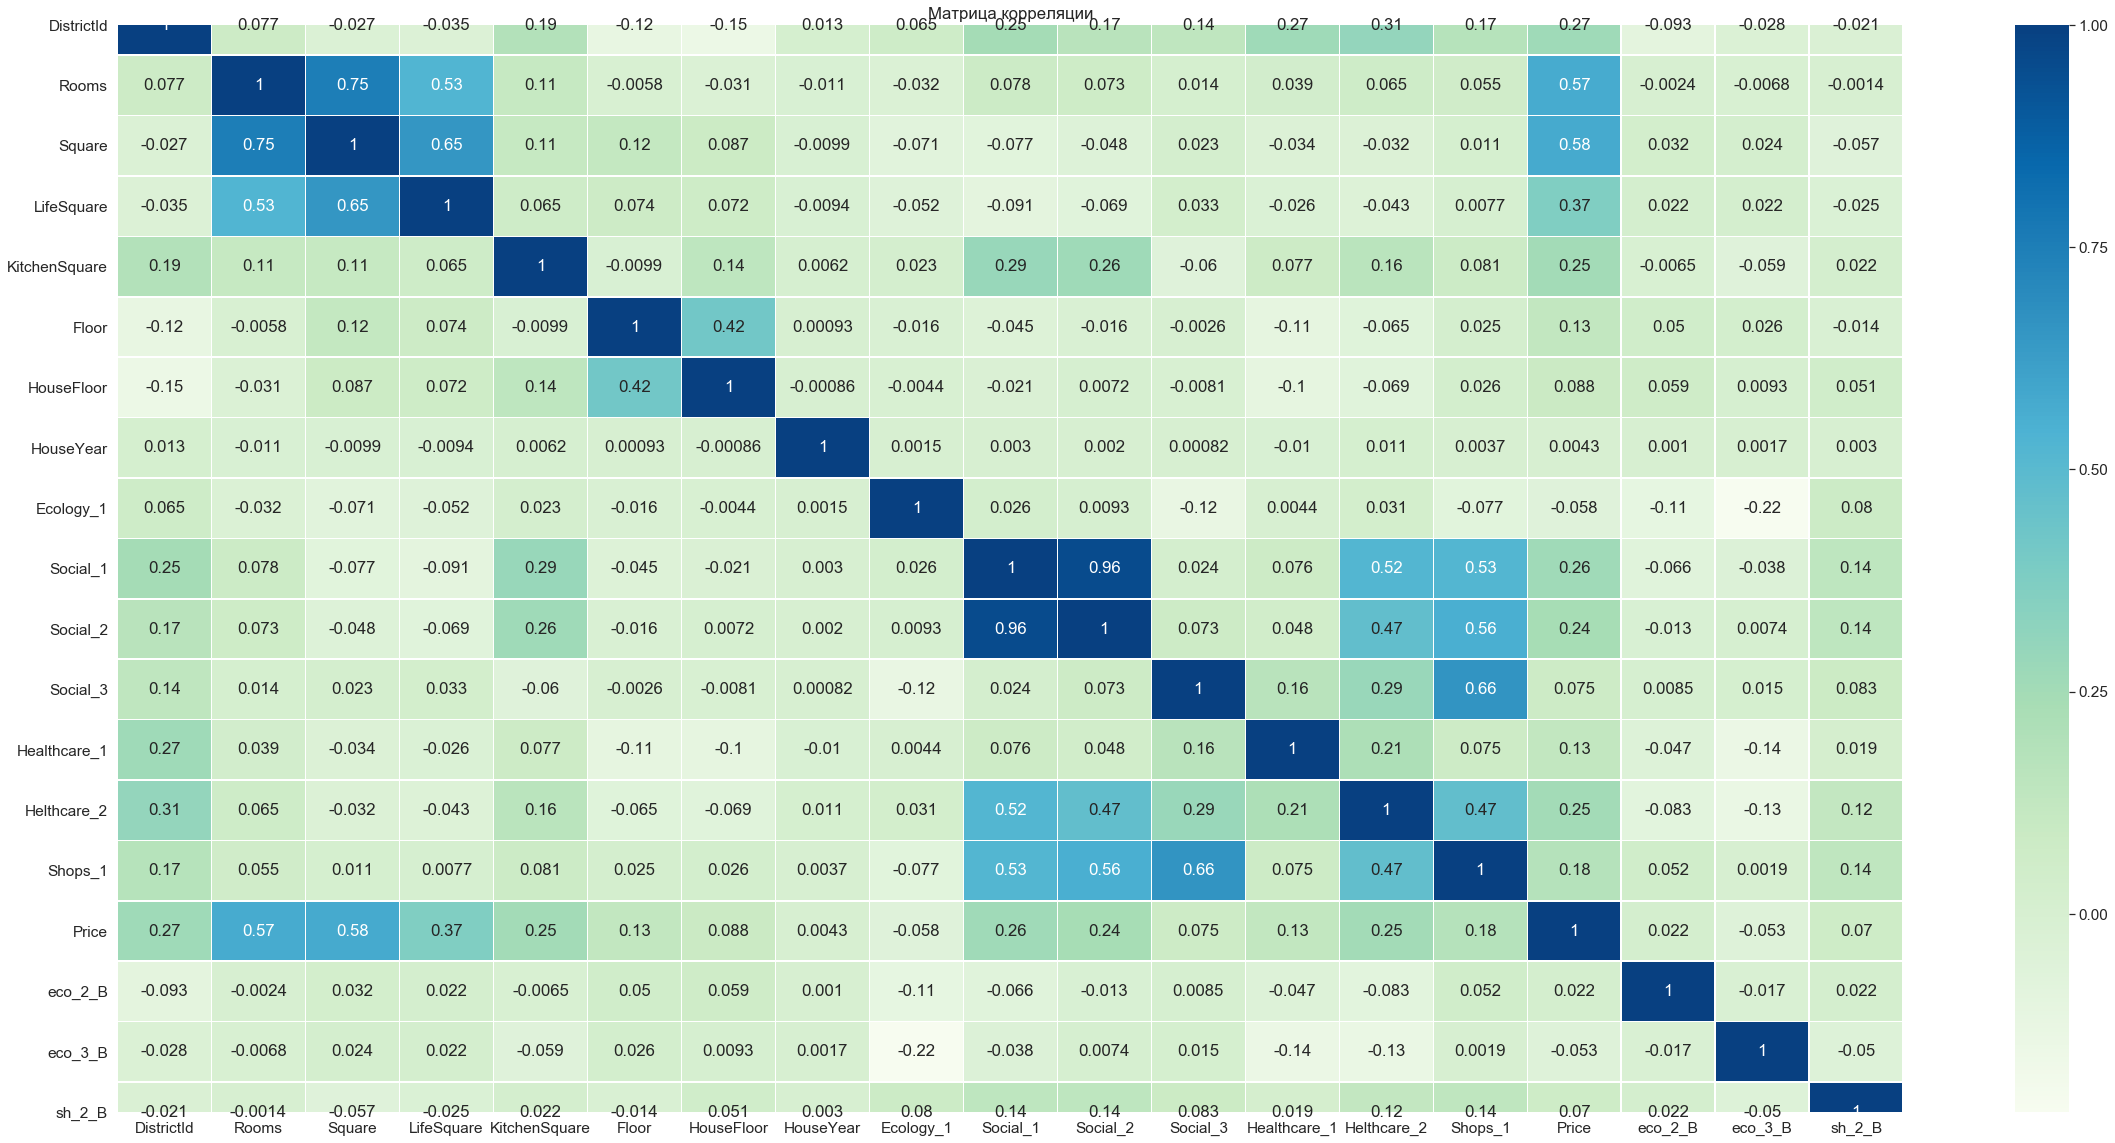

In [55]:
plt.figure(figsize = (40, 20))

sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляции')
plt.show()

##### Видим, что большое влияние оказывают друг на друга признаки Social_1 и Social_2. Удаляем признак Social_2.

In [56]:
df_train = df_train.drop(['Social_2'], axis=1)
df_test = df_test.drop(['Social_2'], axis=1)

##### Видим, что большое влияние оказывают друг на друга признаки Rooms и Square. Удаляем признак Rooms, так как он оказывает меньшее влияние на целевую переменную price.

In [57]:
df_train = df_train.drop(['Rooms'], axis=1)
df_test = df_test.drop(['Rooms'], axis=1)

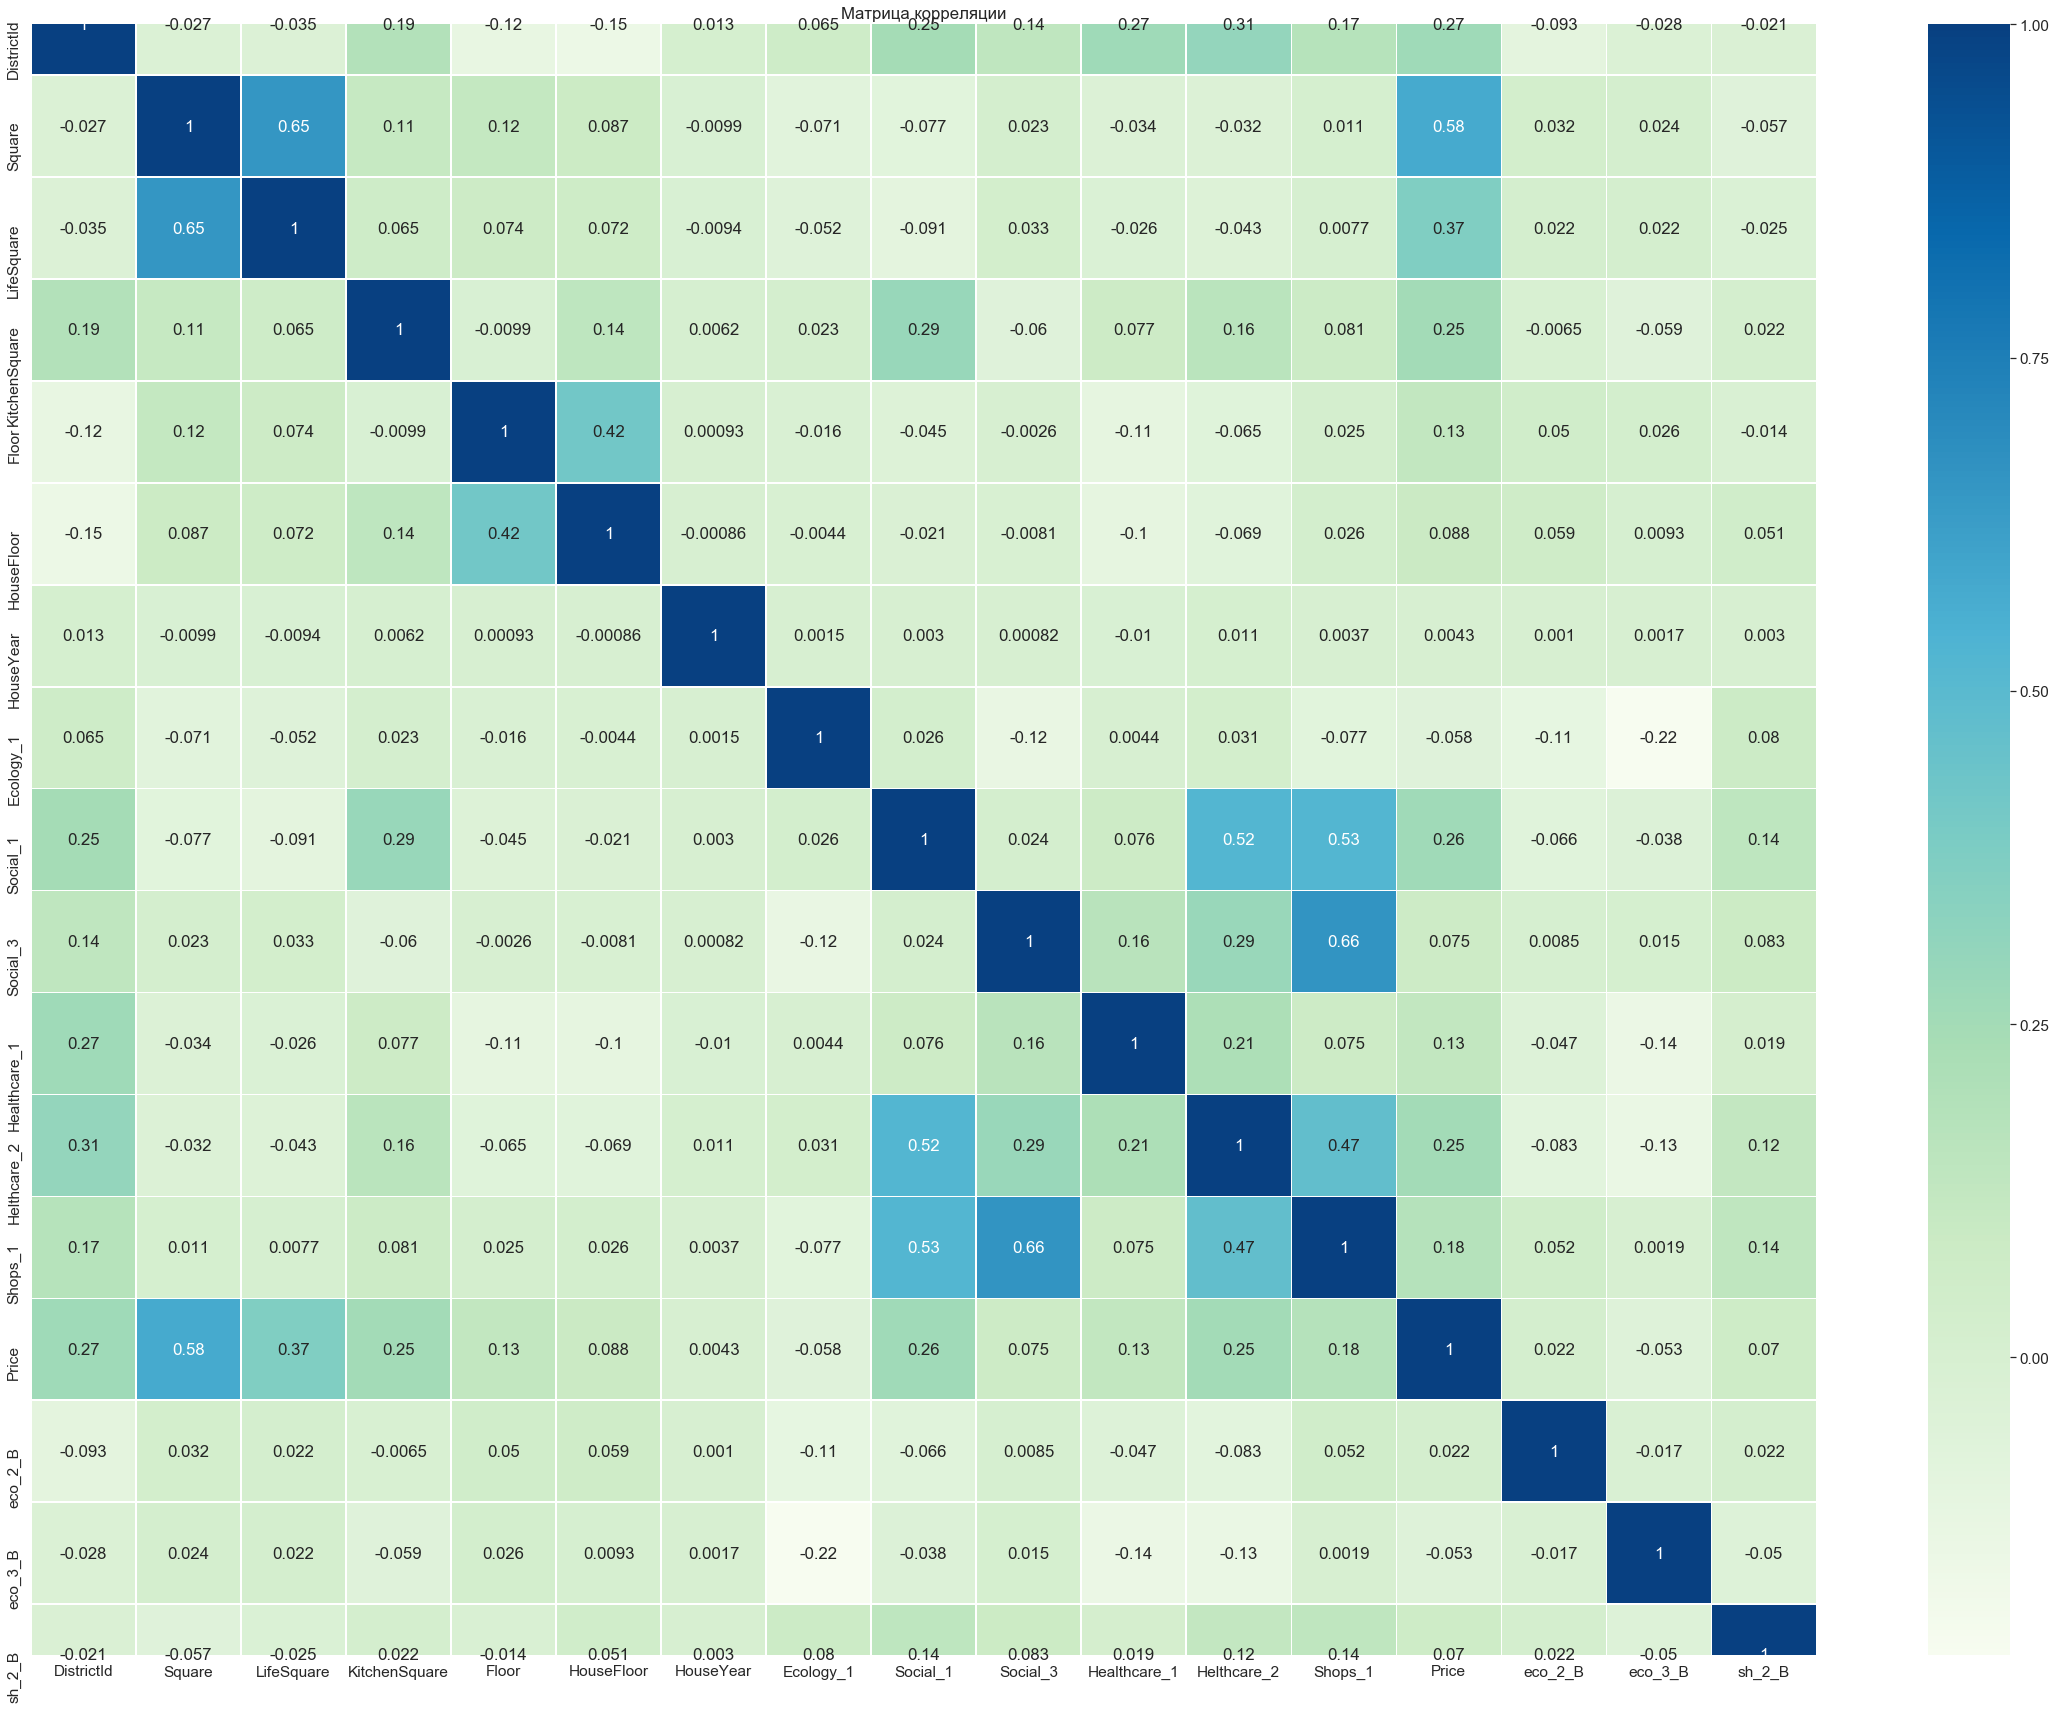

In [58]:
plt.figure(figsize = (40, 30))

sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляции')
plt.show()

### Машинное обучение.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV

##### Стандартизация.

In [60]:
feature_names = ['DistrictId', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Social_1', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'eco_2_B', 'eco_3_B', 'sh_2_B']
target_name = 'Price'

df_train = df_train[feature_names + [target_name]]

In [61]:
df_train.head()

,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,eco_2_B,eco_3_B,sh_2_B,Price
0,35,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,33,5,900.0,0,11,True,True,True,184966.930730
1,41,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,46,1,240.0,1,16,True,True,True,300009.450063
2,53,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,34,0,229.0,1,3,True,True,True,220925.908524
3,58,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,23,3,1084.0,0,5,True,True,True,175616.227217
4,99,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,35,1,2078.0,2,4,True,True,True,150226.531644


In [62]:
feature_names_for_stand = df_train[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler();
stand_features = scaler.fit_transform(df_train[feature_names_for_stand])
df_train[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
df_train.head()

,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,eco_2_B,eco_3_B,sh_2_B,Price
0,-0.353348,-0.427415,-0.369928,0.026908,-0.291592,-0.532703,-0.010081,-0.250529,0.474169,-0.127533,-0.169240,-0.883480,1.408356,True,True,True,184966.930730
1,-0.215687,0.497038,0.290934,0.423778,-0.291592,-0.532703,-0.010036,-0.998053,1.215681,-0.295384,-1.053217,-0.213923,2.448700,True,True,True,300009.450063
2,0.059635,-0.585839,-0.385201,-1.163704,-0.100409,-0.089940,-0.010086,-0.581588,0.531208,-0.337347,-1.067950,-0.213923,-0.256195,True,True,True,220925.908524
3,0.174352,-0.146904,1.081092,0.622214,-0.100409,0.647998,-0.010041,2.680470,-0.096225,-0.211458,0.077202,-0.883480,0.159943,True,True,True,175616.227217
4,1.115034,-0.862556,-0.722988,0.225343,0.473139,-0.089940,-0.010046,-0.894969,0.588247,-0.295384,1.408526,0.455633,-0.048126,True,True,True,150226.531644


###### Разбиение на train и test.

##### Модель линейной регрессии

In [70]:
X_tr = df_train[feature_name]
y_tr = df_train[target_name]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.33, shuffle=True, random_state=23)

In [74]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_train_preds = lr_model.predict(X_train)
r2(y_train, y_train_preds)

0.5168778487880179

##### Модель RandomForest

In [78]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

D:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [79]:
y_train_preds = rf_model.predict(X_train)
r2(y_train, y_train_preds)

0.9495639189171976

##### Подбор параметров

In [84]:
params = {'n_estimators':[50, 100, 200, 400, 600],
            'max_depth': [3, 5, 7, 10, 12, 15]}

gs = GridSearchCV(rf_model, params, scoring='r2', cv=KFold(n_splits=3, random_state=23, shuffle=True), n_jobs=-1)
gs.fit(X_tr, y_tr)

GridSearchCV(cv=KFold(n_splits=3, random_state=23, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
  

In [85]:
gs.best_params_

{'max_depth': 15, 'n_estimators': 600}

In [86]:
gs.best_score_

0.7307093005455702

##### Обучение и оценка модели.

In [87]:
final_model = RandomForestRegressor(n_estimators=600, max_depth = 15, random_state=23)
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=23, verbose=0,
                      warm_start=False)

In [88]:
y_train_preds = final_model.predict(X_train)
r2(y_train, y_train_preds)

0.9451688927738937

In [95]:
y_test_preds = final_model.predict(X_test)
r2(y_test, y_test_preds)

0.7058197210419046

##### Обработка тестового DataSet.

In [96]:
features = ['DistrictId', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Social_1', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'eco_2_B', 'eco_3_B', 'sh_2_B']
features_for_stand = df_test[features].select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler();
stand_features = scaler.fit_transform(df_test[features_for_stand])
df_test[features_for_stand] = pd.DataFrame(stand_features, columns=features_for_stand)
df_test.head()

,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,eco_2_B,eco_3_B,sh_2_B
0,0.152140,-0.345688,-0.129308,0.041828,-0.486187,0.212111,-0.667299,1.585280,-0.794834,-0.304366,-0.168811,-0.891612,-0.888194,True,True,True
1,0.514336,0.685164,-0.162153,-1.086216,-0.486187,-1.734682,-0.398066,-0.367283,-1.080052,-0.220549,-0.168811,-0.891612,-0.469511,True,True,True
2,3.140252,-2.275679,-1.260465,1.395481,-1.231301,-1.135669,-4.059632,-0.998468,0.288994,3.299785,4.791278,2.487242,0.158513,True,True,True
3,-0.096869,0.886404,1.068066,0.718654,2.494270,1.410137,1.217331,-0.149940,-0.110311,-0.220549,-0.168811,1.135700,-0.260169,True,True,True
4,-0.549613,-0.470979,0.514714,-1.086216,1.562877,0.661370,1.755796,-0.397445,-1.308227,-0.304366,-0.168811,-0.891612,-0.888194,True,True,False


In [103]:
df_test['Price'] = final_model.predict(df_test[features])
df_test.head()

,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,eco_2_B,eco_3_B,sh_2_B,Price
0,0.152140,-0.345688,-0.129308,0.041828,-0.486187,0.212111,-0.667299,1.585280,-0.794834,-0.304366,-0.168811,-0.891612,-0.888194,True,True,True,198266.448529
1,0.514336,0.685164,-0.162153,-1.086216,-0.486187,-1.734682,-0.398066,-0.367283,-1.080052,-0.220549,-0.168811,-0.891612,-0.469511,True,True,True,254682.275234
2,3.140252,-2.275679,-1.260465,1.395481,-1.231301,-1.135669,-4.059632,-0.998468,0.288994,3.299785,4.791278,2.487242,0.158513,True,True,True,140531.394631
3,-0.096869,0.886404,1.068066,0.718654,2.494270,1.410137,1.217331,-0.149940,-0.110311,-0.220549,-0.168811,1.135700,-0.260169,True,True,True,336093.014111
4,-0.549613,-0.470979,0.514714,-1.086216,1.562877,0.661370,1.755796,-0.397445,-1.308227,-0.304366,-0.168811,-0.891612,-0.888194,True,True,False,143545.080318


In [108]:
df_test_1 = pd.read_csv(DATASET_TEST_PATH, delimiter=',')
df_test = pd.concat([df_test_1['Id'], df_test['Price']], axis=1)
df_test.head()

,Id,Price
0,725,198266.448529
1,15856,254682.275234
2,5480,140531.394631
3,15664,336093.014111
4,14275,143545.080318


In [109]:
df_test.to_csv('IIMatsal_prediction.csv', index=False)